In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno #
import plotly.express as px

In [9]:
df= pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
181948      ZWE    Africa     Zimbabwe  2022-04-22     247488.0      105.0   
181949      ZWE    Africa     Zimbabwe  2022-04-23     247524.0       36.0   
181950      ZWE    Africa     Zimbabwe  2022-04-24     247524.0        0.0   
181951      ZWE    Africa     Zimbabwe  2022-04-25     247598.0       74.0   
181952      ZWE    Africa     Zimbabwe  2022-04-26     247667.0       69.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
181948              35.857        5468.0         1.0                0.857   
181949              41.000        5468.0         0.0                0.857   
181950              35.143        5468.0         0.0                0.714   
181951              43.000        5468.0         0.0                0.571   
181952              52.857        5469.0         1.0                0.714   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
181948  ...             1.6          30.7                  36.791   
181949  ...             1.6          30.7                  36.791   
181950  ...             1.6          30.7                  36.791   
181951  ...             1.6          30.7                  36.791   
181952  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
181948                         1.7            61.49                    0.571   
181949                         1.7            61.49                    0.571   
181950                         1.7            61.49                    0.571   
181951                         1.7            61.49                    0.571   
181952                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

In [10]:
df.shape


(181953, 67)

<AxesSubplot:>

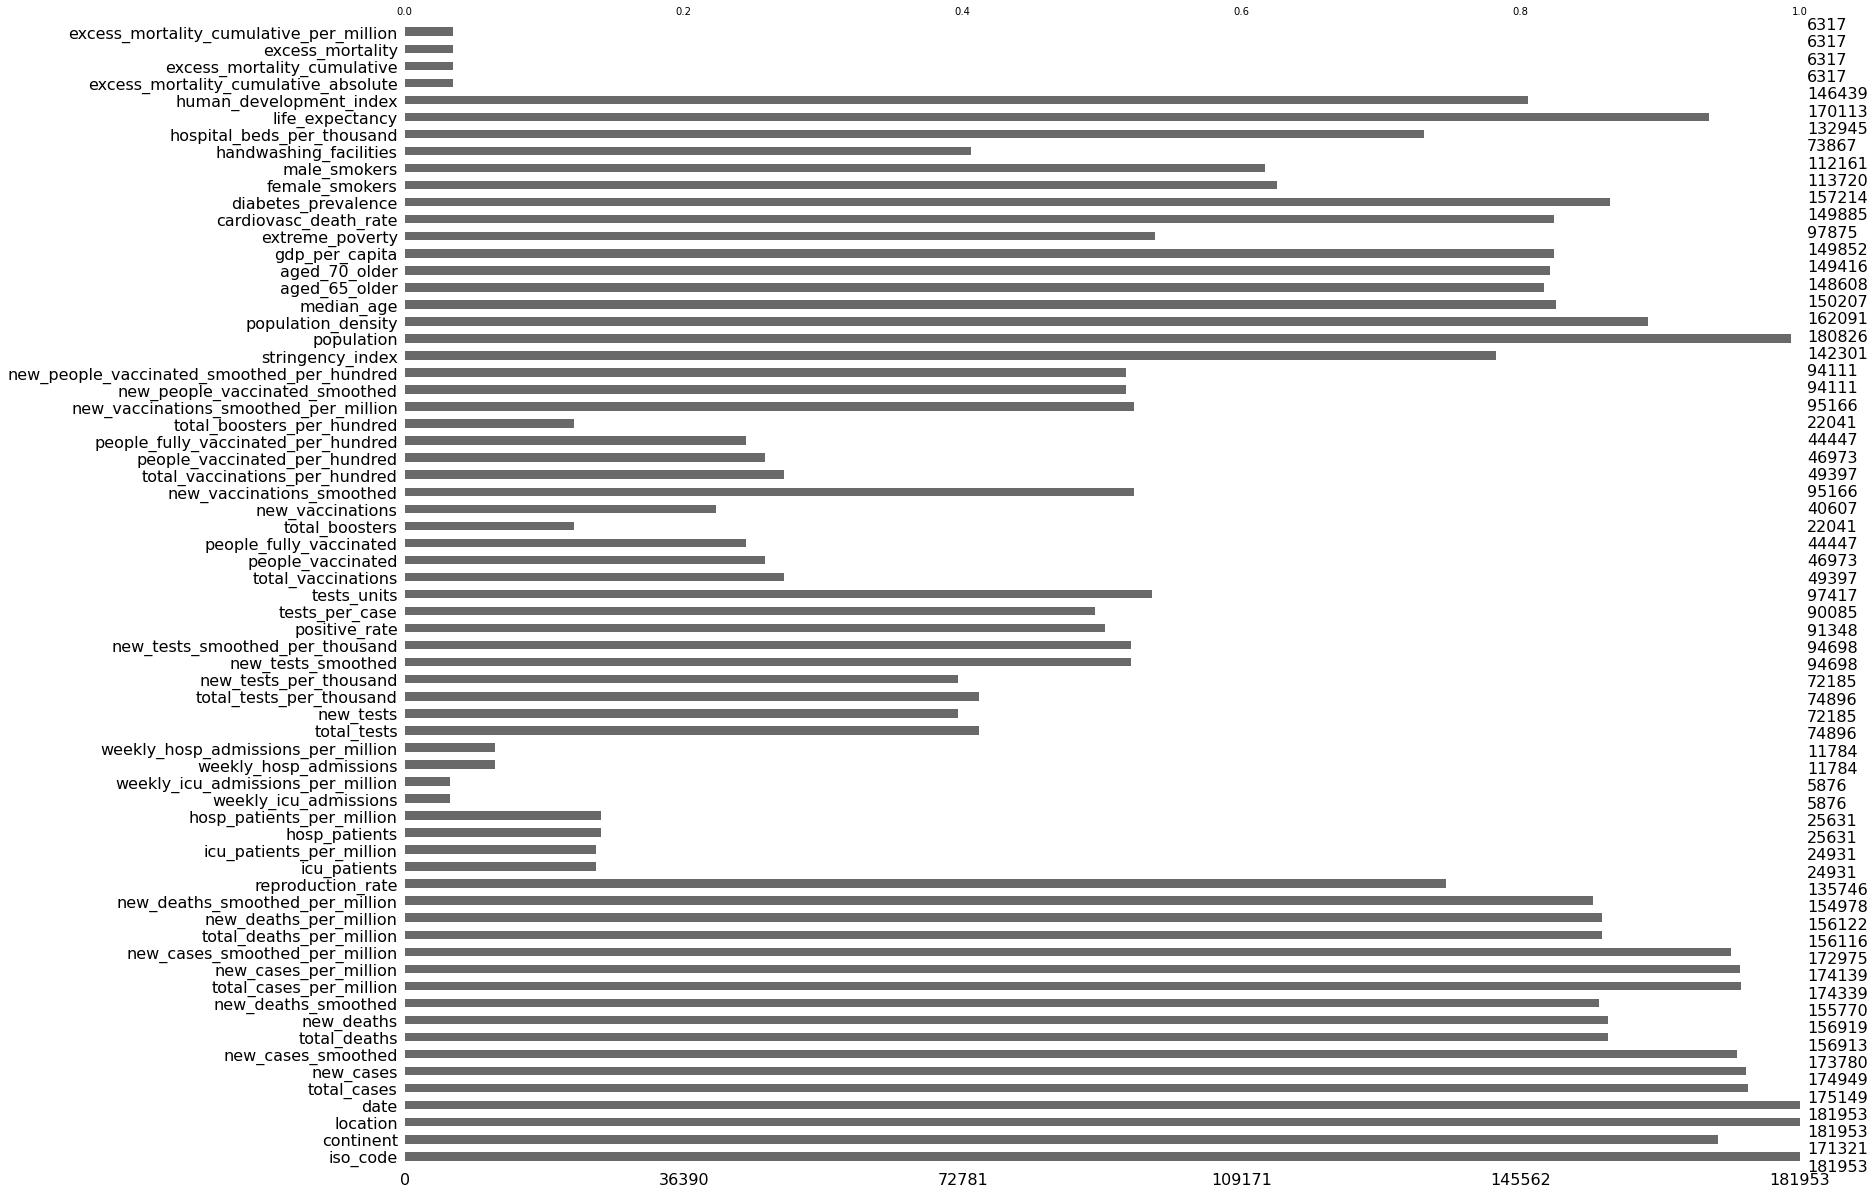

In [11]:
msno.bar(df)

In [12]:
#Check all column names
df.columns.values


array(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 't

## a) Use .drop() to drop the columns that are not required for our analysis

In [13]:
df1 = df.drop({'continent','total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative', 'excess_mortality',
       'excess_mortality_cumulative_per_million'} , axis = 1)
df1

iso_code     location        date  people_vaccinated_per_hundred
0           AFG  Afghanistan  2020-02-24                            NaN
1           AFG  Afghanistan  2020-02-25                            NaN
2           AFG  Afghanistan  2020-02-26                            NaN
3           AFG  Afghanistan  2020-02-27                            NaN
4           AFG  Afghanistan  2020-02-28                            NaN
...         ...          ...         ...                            ...
181948      ZWE     Zimbabwe  2022-04-22                          38.58
181949      ZWE     Zimbabwe  2022-04-23                          38.62
181950      ZWE     Zimbabwe  2022-04-24                            NaN
181951      ZWE     Zimbabwe  2022-04-25                          38.67
181952      ZWE     Zimbabwe  2022-04-26                            NaN

[181953 rows x 4 columns]

In [15]:
df1 = df1.loc[(df['date'] >= '2020-01-12')]

In [16]:
df1 = df1.sort_values(by = ['location','date'])
df1

iso_code     location        date  people_vaccinated_per_hundred
281         AFG  Afghanistan  2020-12-01                            NaN
282         AFG  Afghanistan  2020-12-02                            NaN
283         AFG  Afghanistan  2020-12-03                            NaN
284         AFG  Afghanistan  2020-12-04                            NaN
285         AFG  Afghanistan  2020-12-05                            NaN
...         ...          ...         ...                            ...
181948      ZWE     Zimbabwe  2022-04-22                          38.58
181949      ZWE     Zimbabwe  2022-04-23                          38.62
181950      ZWE     Zimbabwe  2022-04-24                            NaN
181951      ZWE     Zimbabwe  2022-04-25                          38.67
181952      ZWE     Zimbabwe  2022-04-26                            NaN

[120880 rows x 4 columns]

In [8]:
df1['iso_code'].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GGY', 'GIN',
       'GNB', 'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',

In [9]:
OWID_DATA = ['OWID_ASI' ,'OWID_EUR','OWID_AFR','OWID_SAM', 'OWID_NAM','OWID_OCE']
Data= df1[df1['iso_code'].isin(OWID_DATA)]
Data

iso_code       location        date  people_vaccinated_per_hundred
1327    OWID_AFR         Africa  2021-08-01                           3.18
1328    OWID_AFR         Africa  2021-08-02                           3.23
1329    OWID_AFR         Africa  2021-08-03                           3.34
1330    OWID_AFR         Africa  2021-08-04                           3.36
1331    OWID_AFR         Africa  2021-08-05                           3.41
...          ...            ...         ...                            ...
151848  OWID_SAM  South America  2022-04-21                          83.91
151849  OWID_SAM  South America  2022-04-22                          83.92
151850  OWID_SAM  South America  2022-04-23                          83.93
151851  OWID_SAM  South America  2022-04-24                          83.93
151852  OWID_SAM  South America  2022-04-25                          83.93

[1608 rows x 4 columns]

In [10]:
Data.dtypes ##Check the datatype for each column

iso_code                          object
location                          object
date                              object
people_vaccinated_per_hundred    float64
dtype: object

In [33]:
Data['date'] = pd.to_datetime(df['date'])







C:\Users\Sonika\AppData\Local\Temp/ipykernel_9812/3140041021.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
Data.dtypes ##Check the datatype for each column

iso_code                                 object
location                                 object
date                             datetime64[ns]
people_vaccinated_per_hundred           float64
dtype: object

In [35]:
Data.isna().sum()

iso_code                         0
location                         0
date                             0
people_vaccinated_per_hundred    0
dtype: int64

<AxesSubplot:>

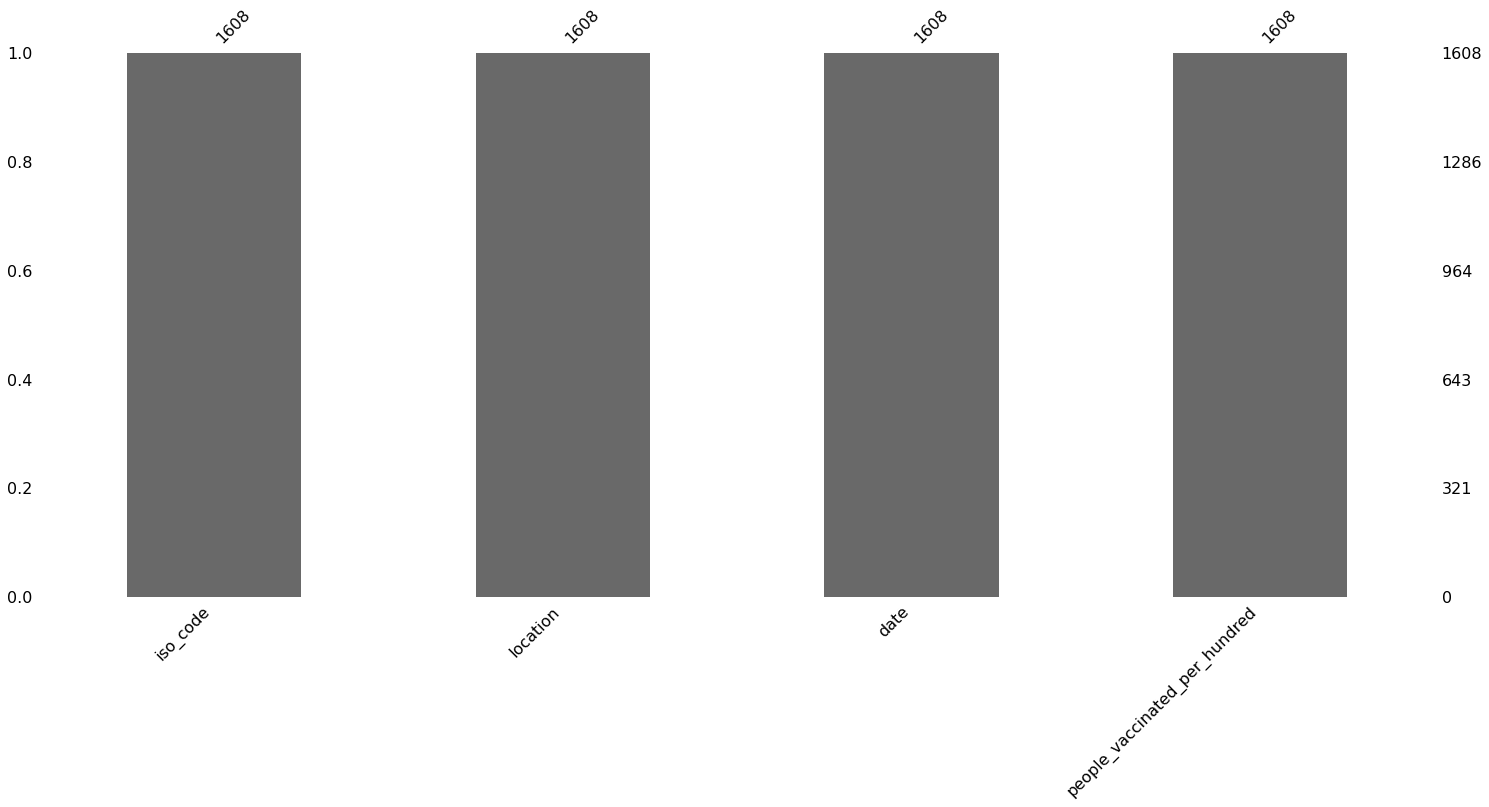

In [36]:
msno.bar(Data)

In [37]:
Data.duplicated().sum()

0

In [38]:
df1= Data.groupby(['location','date'])['people_vaccinated_per_hundred'].sum() \
.groupby(['location']).max().sort_values() \
.groupby(['location']).sum().sort_values(ascending = False)

In [39]:
top6 = pd.DataFrame(df1).head(6)

In [40]:
top6

people_vaccinated_per_hundred
location                                    
South America                          83.93
Asia                                   74.86
North America                          71.91
Europe                                 68.33
Oceania                                66.59
Africa                                 21.25

In [41]:
fig = px.bar(top6, x=top6.index, y='people_vaccinated_per_hundred', labels={'x':'Continent'},
color="people_vaccinated_per_hundred", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='COVID-19 vaccinations by continent')
fig.show()

In [29]:
df1= Data.groupby(['location','date'])['people_vaccinated_per_hundred'].sum()

In [30]:
df1

location       date      
Africa         2021-08-01     3.18
               2021-08-02     3.23
               2021-08-03     3.34
               2021-08-04     3.36
               2021-08-05     3.41
                             ...  
South America  2022-04-21    83.91
               2022-04-22    83.92
               2022-04-23    83.93
               2022-04-24    83.93
               2022-04-25    83.93
Name: people_vaccinated_per_hundred, Length: 1608, dtype: float64

In [45]:
df1 = Data['date'].groupby([Data.date..dt.year,Data.date.dt.month]),['people_vaccinated_per_hundred'].sum().sort_values()




SyntaxError: invalid syntax (Temp/ipykernel_9812/2493872829.py, line 1)

In [47]:
df1 = Data.groupby('date', as_index=False)['people_vaccinated_per_hundred'].sum()
df1 = df1.set_index(df['date'].rename('year').dt.year, append=True)
print (df1)

ValueError: Length mismatch: Expected 268 rows, received array of length 181704